<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/main/Desafio6_completo_em_squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 6: Desafio de Classificação - Diagnóstico de Alzheimer com Dados Cognitivos

### Bootcamp Data Analytics – WoMakersCode  
👩🏽‍💻 Squad: Mae C. Jemison
### 👥 Integrantes:

- Amparo Silvia Pastor Castillo Runschka  
- Cristiana Alves Moura  
- Fernanda Monello Correa Manoel  
- Larissa Monique de Sousa Rodrigues  
- Raquel Nunes Matos Rios  
- Vanessa Lima Paraizo  
- Verônica Lima Costa  

## 📝 Descrição do Desafio

Contexto
Este desafio utiliza o conjunto de dados OASIS (Open Access Series of
Imaging Studies), que contém informações clínicas e demográficas de
pacientes com potencial risco de Alzheimer. O objetivo é prever se o
paciente apresenta sinais de demência.
A variável alvo é binária:
* 0: Sem demência
* 1: Com demência

📁 *Este notebook contém todas as etapas da análise de dados desenvolvida para o desafio.*

## 📚 Importação de Bibliotecas

Antes de começar, vamos importar as bibliotecas necessárias para manipulação, análise e visualização dos dados.

In [27]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações estéticas para os gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Estatística
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Avisos
import warnings
warnings.simplefilter(action='ignore')

### 📁 Visualização Inicial

Nesta etapa, vamos observar as primeiras linhas do dataset para entender sua estrutura, as colunas disponíveis e o formato dos dados.

Nosso objetivo aqui é ter uma visão geral antes de qualquer limpeza ou tratamento.

In [28]:
# Configurando URL a partir do id do arquivo compartilhado

id_do_arquivo = "1FmLKaVzvG7YD8dwMFlw-W5ZuGCbuRcPb"
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'
df = pd.read_csv(url)
df.head()

,Age,Sex,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,66,M,19,5,21,1.0,1474,0.768,1.11,0
1,79,M,14,5,22,2.0,1630,0.722,0.82,0
2,88,M,8,5,22,0.0,1432,0.668,1.24,1
3,74,M,14,3,24,1.0,1276,0.833,1.29,0
4,70,M,18,4,25,0.0,1605,0.677,1.28,0


### 📉 Verificação de Valores Ausentes e Duplicatas

Nesta etapa, vamos verificar se existem valores ausentes ou registros duplicados no dataset.

Esses problemas podem impactar os resultados das análises estatísticas e visualizações, e devem ser tratados ainda na fase de pré-processamento.

In [29]:
# Verificar tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     200 non-null    int64  
 1   Sex     200 non-null    object 
 2   EDUC    200 non-null    int64  
 3   SES     200 non-null    int64  
 4   MMSE    200 non-null    int64  
 5   CDR     200 non-null    float64
 6   eTIV    200 non-null    int64  
 7   nWBV    200 non-null    float64
 8   ASF     200 non-null    float64
 9   Group   200 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 15.8+ KB


In [30]:
# Verificar valores ausentes
print("🔍 Valores ausentes por coluna:")
print(df.isnull().sum())

# Verificar registros duplicados
duplicatas = df.duplicated().sum()
print(f"\n📦 Registros duplicados encontrados: {duplicatas}")

🔍 Valores ausentes por coluna:
Age      0
Sex      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
dtype: int64

📦 Registros duplicados encontrados: 0


In [31]:
# Obtenção de dados estatísticos
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,74.820000,12.335000,3.110000,19.57500,0.830000,1494.100000,0.757850,1.048050,0.270000
std,9.094015,4.214449,1.469249,5.93807,0.730595,104.309358,0.060322,0.148604,0.445074
min,60.000000,6.000000,1.000000,10.00000,0.000000,1234.000000,0.651000,0.800000,0.000000
25%,67.000000,8.750000,2.000000,14.00000,0.000000,1420.000000,0.702000,0.910000,0.000000
50%,74.000000,12.000000,3.000000,20.00000,0.500000,1497.500000,0.767000,1.040000,0.000000
75%,83.000000,16.000000,4.000000,25.00000,1.000000,1559.250000,0.813250,1.170000,1.000000
max,89.000000,19.000000,5.000000,29.00000,2.000000,1764.000000,0.850000,1.300000,1.000000


In [32]:
# Selecionando variáveis numéricas de acordo com os tipos:

# Seleciona apenas colunas numéricas
numerico_df = df.select_dtypes(include=['float64', 'int64'])

# Exibe os nomes das colunas numéricas
numerico_df.columns

Index(['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Group'], dtype='object')

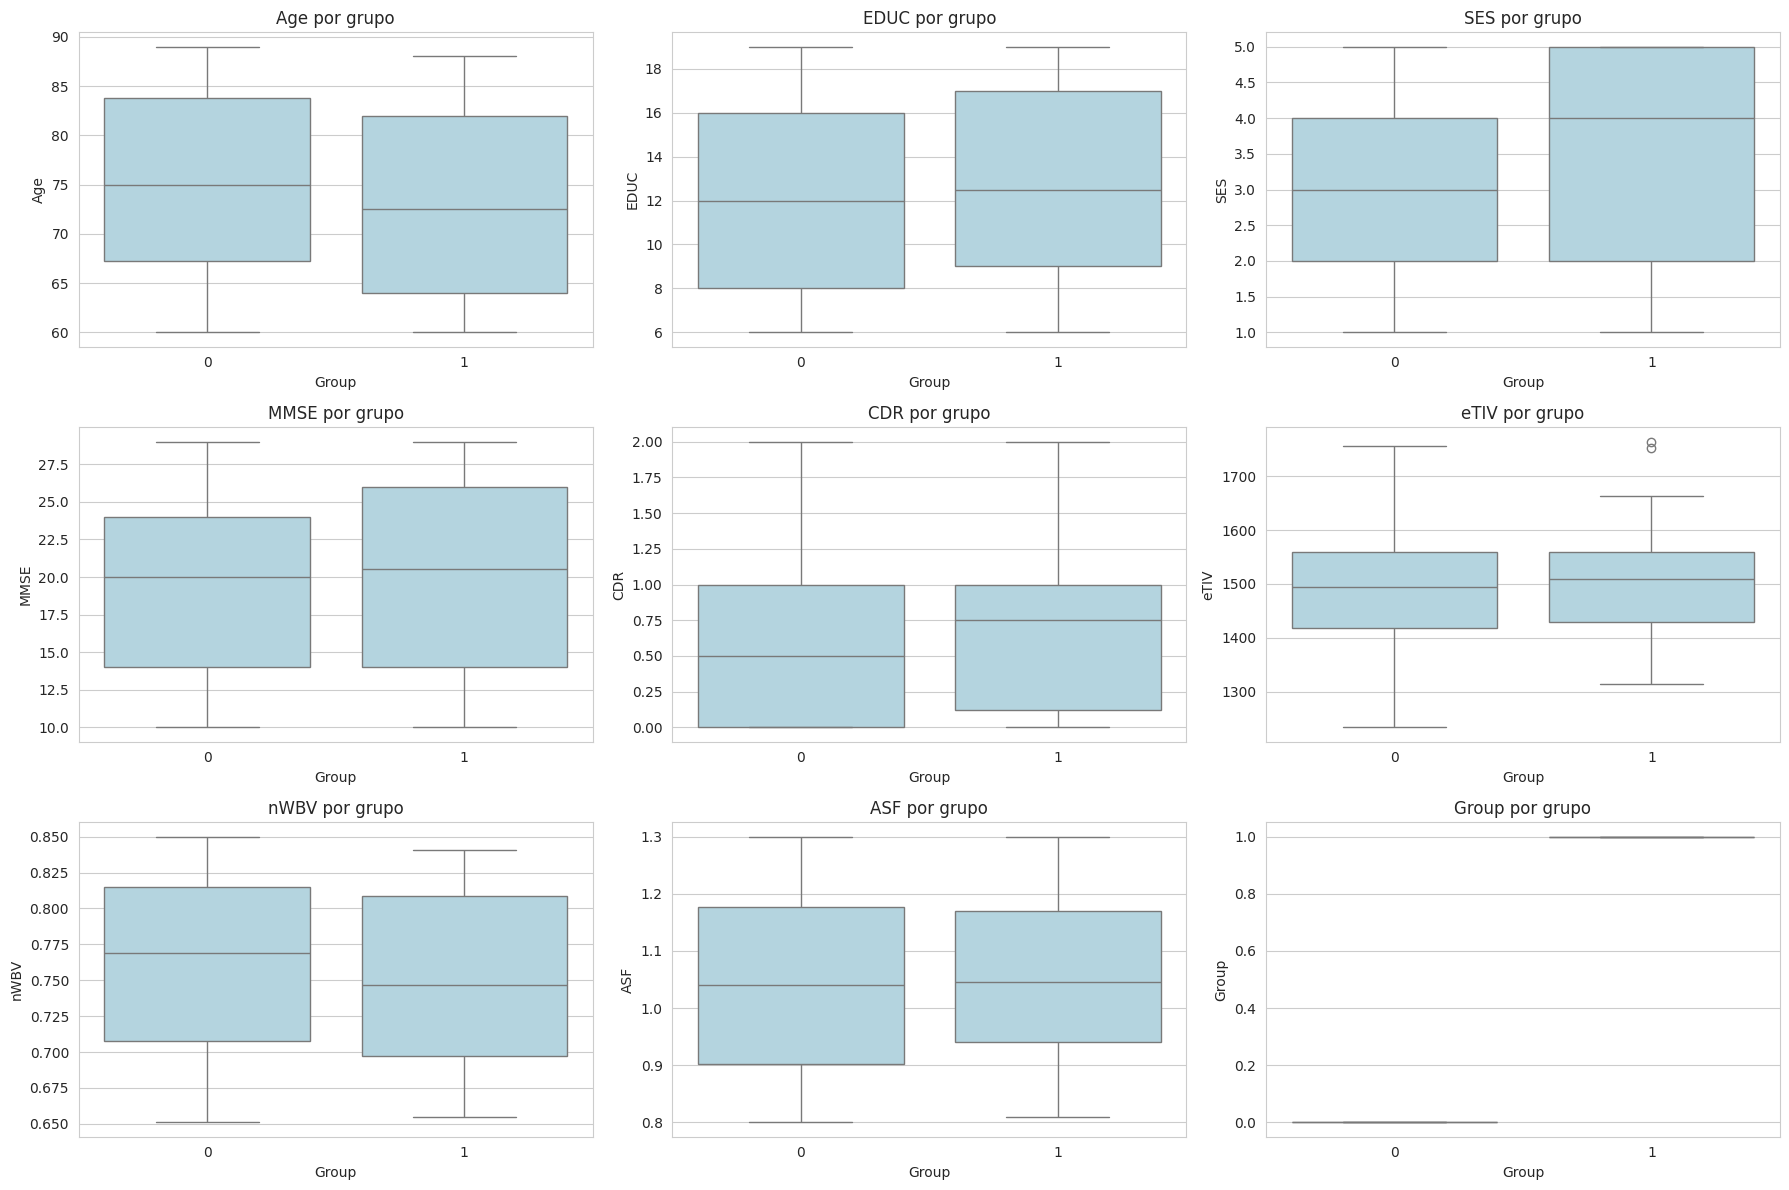

In [33]:
import math

# Usar as colunas numéricas do DataFrame 'numerico_df' criado anteriormente
num_vars = len(numerico_df.columns)
cols = 3  # número de gráficos por linha
rows = math.ceil(num_vars / cols)  # calcular número de linhas necessárias

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows), squeeze=False)

boxplot_color = "lightblue"

# Iterar sobre os nomes das colunas numéricas
for i, var in enumerate(numerico_df.columns):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    sns.boxplot(x='Group', y=var, data=df, ax=ax, color=boxplot_color)
    ax.set_title(f'{var} por grupo')
    ax.set_xlabel('Group')
    ax.set_ylabel(var)

# Remover eixos vazios caso existam (quando num_vars não é múltiplo de cols)
for j in range(num_vars, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.tight_layout()
plt.show()

In [34]:
# Calculando a correlação de Pearson

# Selecionando variáveis numéricas de acordo com os tipos:
numerico_df = df.select_dtypes(include=['float64', 'int64'])

# Calcula a correlação de todas as variáveis numéricas
correlations = numerico_df.corr()
# Exibe as correlações
print(correlations)

            Age      EDUC       SES      MMSE       CDR      eTIV      nWBV  \
Age    1.000000  0.022560  0.023303 -0.095969  0.016927 -0.037005 -0.066078   
EDUC   0.022560  1.000000  0.025669  0.045074  0.085502  0.000758 -0.005909   
SES    0.023303  0.025669  1.000000  0.084870  0.090070  0.052259  0.110977   
MMSE  -0.095969  0.045074  0.084870  1.000000 -0.134885 -0.040504 -0.020970   
CDR    0.016927  0.085502  0.090070 -0.134885  1.000000 -0.049527  0.064811   
eTIV  -0.037005  0.000758  0.052259 -0.040504 -0.049527  1.000000  0.027471   
nWBV  -0.066078 -0.005909  0.110977 -0.020970  0.064811  0.027471  1.000000   
ASF    0.031457  0.089791  0.081542  0.177585 -0.034311 -0.104985  0.002546   
Group -0.108361  0.050660  0.154153  0.036031 -0.020399  0.063927 -0.073165   

            ASF     Group  
Age    0.031457 -0.108361  
EDUC   0.089791  0.050660  
SES    0.081542  0.154153  
MMSE   0.177585  0.036031  
CDR   -0.034311 -0.020399  
eTIV  -0.104985  0.063927  
nWBV   0.0025

In [35]:
# Calcular correlação com a variável alvo
correlation = numerico_df.corr()['Group'].sort_values(ascending=False)
correlation

,Group
Group,1.000000
SES,0.154153
eTIV,0.063927
EDUC,0.050660
MMSE,0.036031
ASF,0.019397
CDR,-0.020399
nWBV,-0.073165
Age,-0.108361


In [36]:
# SELEÇÃO DE FEATURES COM SELECTKBEST
# Importar SelectKBest e f_classif
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


X = df.drop('Group', axis=1)
y = df['Group']

X = pd.get_dummies(X, drop_first=True) # Example: handles 'Sex'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and fit SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train_scaled, y_train)

# Criando um  DataFrame com os feature scores. Usando  X_train.columns para os nomes das features
feature_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'F_Score': selector.scores_
}).sort_values(by='F_Score', ascending=False)

print(" Ranking das variáveis mais relevantes:")
print(feature_scores)

 Ranking das variáveis mais relevantes:
  Feature   F_Score
2     SES  3.328055
0     Age  2.134007
6    nWBV  0.985588
5    eTIV  0.890302
1    EDUC  0.628856
7     ASF  0.321241
3    MMSE  0.221436
4     CDR  0.200213
8   Sex_M  0.123922


🔝 **Top 3 correlações positivas:**

SES (Status Socioeconômico): 0.15

eTIV (Volume intracraniano): 0.06

EDUC (Escolaridade): 0.05

🔻 **Top 3 correlações negativas:**

Age (Idade): -0.11

nWBV (Volume cerebral normalizado): -0.07

CDR (Clinical Dementia Rating): -0.02 ← surpreendente, mas pode ser explicável por como os dados foram rotulados.

#👀 Nenhuma variável tem correlação forte (> 0.3), no entanto SES (Status Socioeconômico), Age(Idade) apresentam maior relevancia na observação do SelectKBest. AS variáveis nWBV (Normalized Whole Brain Volume) e eTIV (Estimated Total Intracranial Vol) aparecem com scores intermediários (0.98 e 0.89), indicando alguma relevância, porém menor que SES e Age.

In [37]:
# 1. Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [38]:
# Transformar variável categórica 'Sex' em valores numéricos
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
# Isso cria uma coluna 'Sex_M' com 0 para F e 1 para M (evita multicolinearidade)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Selecionar features relevantes
features_relevantes = ['nWBV','eTIV','ASF','MMSE']
X = df[features_relevantes]
y = df['Group']

# 2. Dividir treino e teste (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Mantém proporção das classes
)

# 3. Normalização CORRETA
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Aprende e transforma treino
X_test = scaler.transform(X_test)        # Apenas transforma teste

In [40]:
# Treinar e avaliar modelos

# Regressão Logística
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Regressão Logística:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# Árvore de Decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Árvore de Decisão:")
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Regressão Logística:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       0.00      0.00      0.00        11

    accuracy                           0.72        40
   macro avg       0.36      0.50      0.42        40
weighted avg       0.53      0.72      0.61        40

[[29  0]
 [11  0]]
Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.60      0.52      0.56        29
           1       0.07      0.09      0.08        11

    accuracy                           0.40        40
   macro avg       0.33      0.30      0.32        40
weighted avg       0.45      0.40      0.42        40

[[15 14]
 [10  1]]
Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        29
           1       0.00      0.00      0.00        11

    accuracy                           0.68        40
   macro avg       0.36      0.47  

In [41]:
from sklearn.metrics import classification_report

# Armazenar os relatórios como dicionários
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Criar um DataFrame comparativo
results = pd.DataFrame({
    'Logistic Regression': pd.Series(report_lr['weighted avg']),
    'Decision Tree': pd.Series(report_tree['weighted avg']),
    'Random Forest': pd.Series(report_rf['weighted avg'])
})

# Exibir apenas precision, recall e f1-score
display(results.loc[['precision', 'recall', 'f1-score']].round(2))


,Logistic Regression,Decision Tree,Random Forest
precision,0.53,0.45,0.52
recall,0.72,0.40,0.68
f1-score,0.61,0.42,0.58


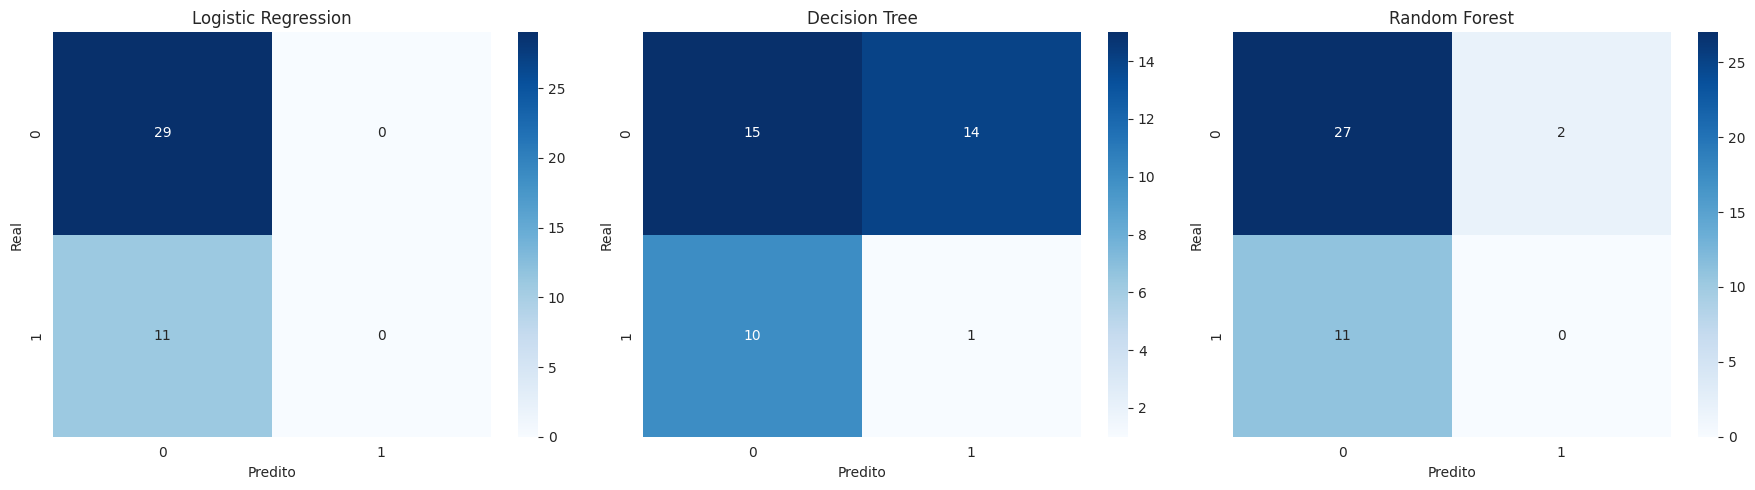

In [42]:
from sklearn.metrics import confusion_matrix

models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_rf
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')
plt.tight_layout()
plt.show()


### Balanceando os dados

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar features e alvo
#X = df.drop('Group', axis=1)
#y = df['Group']

# 1. Selecionar features relevantes
# features_relevantes = ['nWBV', 'eTIV', 'ASF','MMSE','CDR']
X = df[features_relevantes]
y = df['Group']

# Codificar variáveis categóricas (ex: Sex)
X = pd.get_dummies(X, drop_first=True)  # Transforma 'Sex' em coluna binária

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE **apenas no conjunto de treino**
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Normalizar
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


### Treinamento do modelo com os dados balanceados

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Exemplo: Regressão Logística com dados balanceados
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.71      0.50      0.59        44
           1       0.24      0.44      0.31        16

    accuracy                           0.48        60
   macro avg       0.48      0.47      0.45        60
weighted avg       0.58      0.48      0.51        60

[[22 22]
 [ 9  7]]


### Treinamento do modelo com os dados balanceados

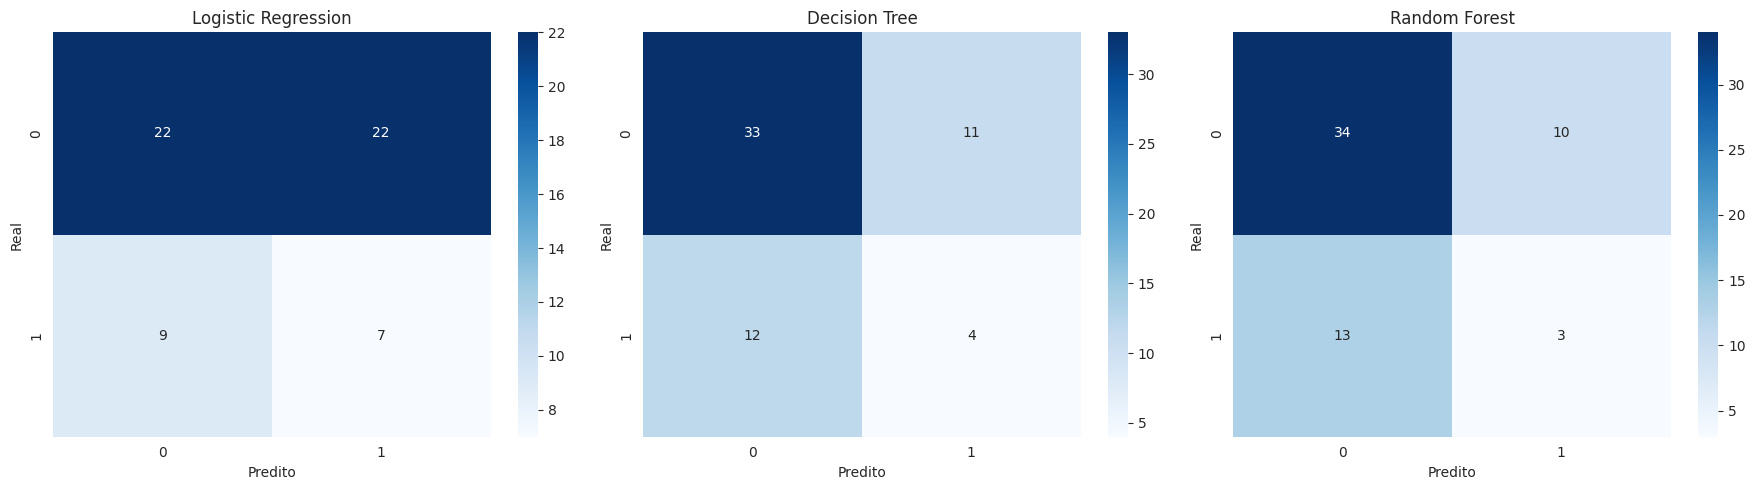

In [45]:
models = {}

# Treinamento com dados balanceados (após SMOTE)
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
models['Logistic Regression'] = logreg.predict(X_test)

tree = DecisionTreeClassifier()
tree.fit(X_train_res, y_train_res)
models['Decision Tree'] = tree.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
models['Random Forest'] = rf.predict(X_test)

# Gráfico de matrizes de confusão
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()


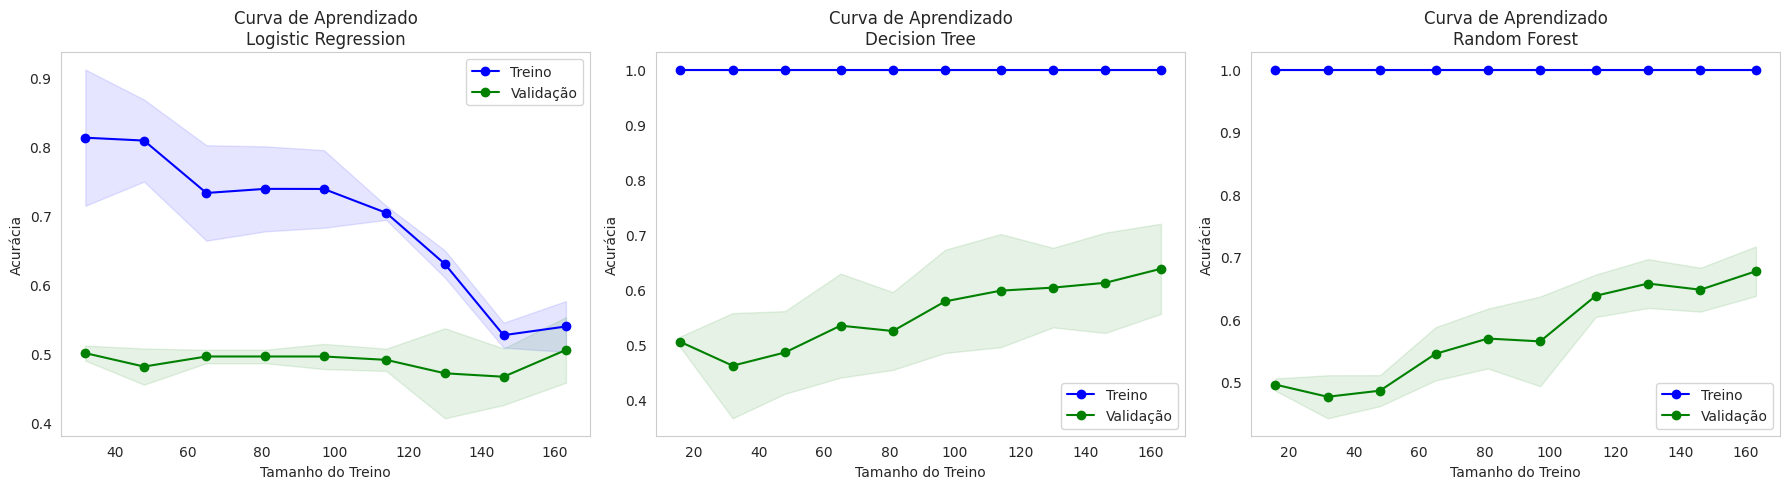

In [46]:
from sklearn.model_selection import learning_curve
import numpy as np

# Configurar a figura para as curvas de aprendizado
plt.figure(figsize=(18, 5))

# Iterar sobre os modelos já treinados
for i, (name, model) in enumerate([('Logistic Regression', logreg),
                                 ('Decision Tree', tree),
                                 ('Random Forest', rf)], 1):

    # Calcular curva de aprendizado (usando os dados balanceados)
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=X_train_res,
        y=y_train_res,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )

    # Calcular médias e desvios padrão
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plotar curva
    plt.subplot(1, 3, i)
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Treino')
    plt.plot(train_sizes, val_mean, 'o-', color='green', label='Validação')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')

    plt.title(f'Curva de Aprendizado\n{name}')
    plt.xlabel('Tamanho do Treino')
    plt.ylabel('Acurácia')
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

Bom aprendizado:

1. Ambas as curvas convergem para valores altos
2. O gap entre treino e validação é pequeno

Overfitting:

1. Alta acurácia no treino mas baixa na validação
2. Grande gap entre as curvas

Underfitting:

1. Ambas as curvas estão baixas
2. Pouco gap mas desempenho ruim

In [47]:
df['Group'].value_counts()

,count
Group,
0,146
1,54


In [48]:
n_minority_ideal = 100
n_total_ideal = int(n_minority_ideal / y_train.mean())
print(n_total_ideal)

368


In [49]:
# Mantém alguma proporção do desbalanceamento original, mas reduz o gap

from sklearn.utils import resample
import pandas as pd # Import pandas

proporcao_alvo = 0.27  #  27% da proporção original
n_total = 400

n_minority_target = int(n_total * proporcao_alvo)
n_majority_target = n_total - n_minority_target

# Separação das classes maioritárias e minoritárias
df_majority = df[df['Group'] == 0]
df_minority = df[df['Group'] == 1]

n_minority = len(df_minority)
n_majority_downsample = int(n_minority * (1 - proporcao_alvo) / proporcao_alvo)

# Reamostragem
df_majority_sampled = resample(df_majority,
                               replace=True,
                               n_samples=n_majority_target,
                               random_state=42)

df_minority_sampled = resample(df_minority,
                               replace=True,
                               n_samples=n_minority_target,
                               random_state=42)


df_bootstrapped = pd.concat([df_majority_sampled, df_minority_sampled])

# You might want to shuffle the concatenated dataframe
df_bootstrapped = df_bootstrapped.sample(frac=1, random_state=42).reset_index(drop=True)

df_bootstrapped['Group'].value_counts()


,count
Group,
0,292
1,108


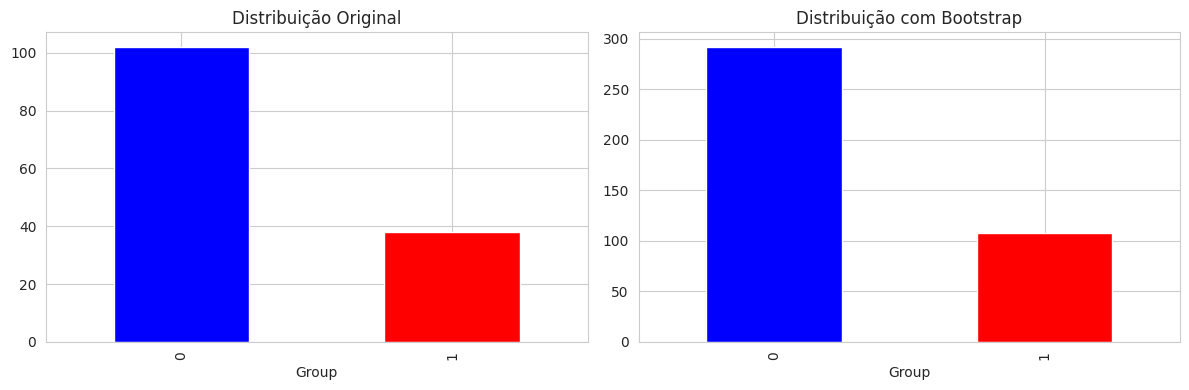

In [50]:
plt.figure(figsize=(12, 4))

# Original
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribuição Original')

# Após bootstrap
plt.subplot(1, 2, 2)
# Extract the 'Group' column from the bootstrapped DataFrame
y_bootstrapped = df_bootstrapped['Group']
pd.Series(y_bootstrapped).value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribuição com Bootstrap')

plt.tight_layout()
plt.show()

In [53]:
# 1. Seleção de features
#features_relevantes = ['nWBV', 'ASF', 'MMSE']
features_relevantes = ['nWBV','eTIV','ASF','MMSE']
X = df_bootstrapped[features_relevantes]
y = df_bootstrapped['Group']

# 2. Divisão estratificada
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# 3. Normalização e SMOTE (aplicados separadamente)

# Normalizar os dados primeiro
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)        # Transform test data

# Aplicar SMOTE apenas nos dados de treino normalizados
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)


# 4. Modelos com validação
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

for name, model in models.items():
    # Fit the model using the resampled and scaled training data
    model.fit(X_train_res, y_train_res)
    # Make predictions on the scaled test data
    y_pred = model.predict(X_test_scaled)

    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.76      0.60      0.67        58
           1       0.32      0.50      0.39        22

    accuracy                           0.57        80
   macro avg       0.54      0.55      0.53        80
weighted avg       0.64      0.57      0.60        80

Confusion Matrix:
[[35 23]
 [11 11]]

Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        58
           1       0.83      0.86      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.91      0.91      0.91        80

Confusion Matrix:
[[54  4]
 [ 3 19]]

Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        58
           1       0.76      0.86      0.81        22

    accuracy                           0.89        80


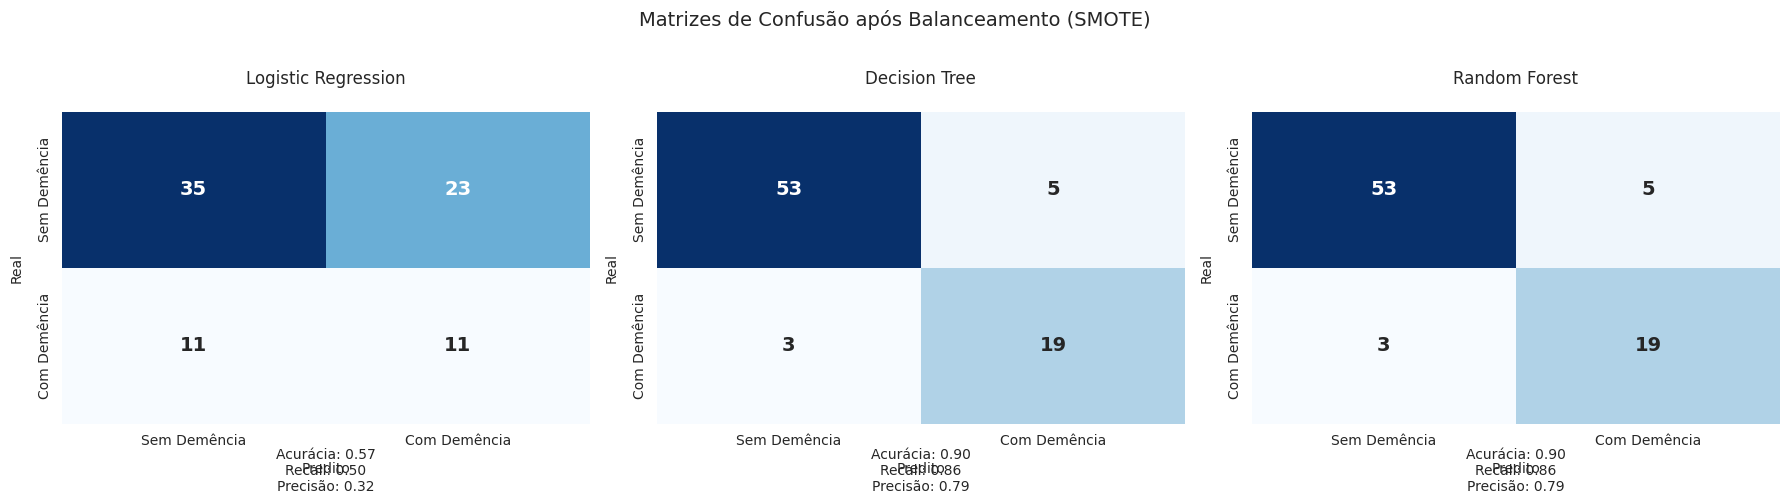

In [54]:

# Dicionário para armazenar as previsões
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Configuração do gráfico
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
plt.suptitle('Matrizes de Confusão após Balanceamento (SMOTE)', y=1.02, fontsize=14)

# Treinar modelos e plotar matrizes
for ax, (name, model) in zip(axes, models.items()):
    # Treinar o modelo
    model.fit(X_train_res, y_train_res)

    # Fazer previsões
    y_pred = model.predict(X_test_scaled)

    # Calcular matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Plotar matriz
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax,
                annot_kws={"size": 14, "weight": "bold"})

    # Configurações do gráfico
    ax.set_title(name, pad=20)
    ax.set_xlabel('Predito', labelpad=10)
    ax.set_ylabel('Real', labelpad=10)
    ax.xaxis.set_ticklabels(['Sem Demência', 'Com Demência'])
    ax.yaxis.set_ticklabels(['Sem Demência', 'Com Demência'])

    # Adicionar métricas na matriz
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)

    ax.text(0.5, -0.15,
            f'Acurácia: {accuracy:.2f}\nRecall: {recall:.2f}\nPrecisão: {precision:.2f}',
            ha='center', va='center', transform=ax.transAxes)

plt.tight_layout()
plt.show()

**Questão 04: Qual a importância relativa de cada variável no modelo final?
A importância das variáveis foi avaliada por correlação e SelectKBest.**

- Correlações: SES (Status Socioeconômico) (0.15), eTIV (Volume Intracraniano Estimado) (0.06) e EDUC (Escolaridade) (0.05) foram as mais correlacionadas positivamente. Idade (-0.11), nWBV (Volume Cerebral Normalizado) (-0.07) e CDR (Clinical Dementia Rating) (-0.02) tiveram correlações negativas. Nenhuma correlação forte (>0.3) foi identificada.

- SelectKBest (F-Scores): SES (3.33) e Idade (2.13) foram as mais relevantes. nWBV (0.98) e eTIV (0.89) tiveram relevância intermediária. As variáveis ASF, MMSE, CDR e Sex_M foram as menos relevantes.

**Questão 05: O modelo apresenta bom desempenho em ambos os grupos (com e sem demência)?**
O balanceamento dos dados foi crucial para o desempenho do modelo.

- Pré-Balanceamento: O desempenho era bom para a classe "Sem Demência" (recall de 1.00 para Regressão Logística). No entanto, para a classe "Com Demência", o desempenho era muito baixo (precisão e recall próximos de 0.00 para Regressão Logística e Random Forest).

- Pós-Balanceamento (SMOTE): O desempenho da classe "Com Demência" melhorou.

- Árvore de Decisão: Melhor desempenho geral, com precisão de 0.90 e recall de 0.86 para a classe "Com Demência".
Random Forest: Bom desempenho, com precisão de 0.79 e recall de 0.86 para a classe "Com Demência".

**Questão 06: É possível identificar pacientes em estágio inicial de demência com esse modelo?**
- A variável CDR (Clinical Dementia Rating), que indica o estágio da demência, teve baixa correlação (-0.02) e um F-Score baixo (0.20). Isso sugere que o modelo pode ter dificuldade em identificar estágios iniciais (CDR 0.5), pois as variáveis e a configuração atual podem não capturar essas nuances.

**Questão 07: O modelo apresenta overfitting ou underfitting? Como isso pode ser ajustado?**
- Situação Inicial: O modelo apresentava overfitting para a classe majoritária ("Sem Demência") e underfitting para a classe minoritária ("Com Demência").

- Ajuste: O balanceamento dos dados com SMOTE foi a principal estratégia, criando amostras sintéticas da classe minoritária.

- Resultados Pós-Ajuste: Árvore de Decisão e Random Forest demonstraram bom aprendizado, com curvas de treino e validação convergindo para valores altos e pequeno gap.